In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data_2_var.csv')

In [5]:
data

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000
...,...,...
1105,-115.366669,121.000000
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   -122.7406674  1110 non-null   float64
 1   -130.5720846  1110 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [7]:
data.describe()

,-122.7406674,-130.5720846
count,1110.000000,1110.000000
mean,6.899714,-26.093318
std,79.324069,69.755980
min,-134.962839,-132.422167
25%,-53.366669,-76.994298
50%,15.739103,-46.036319
75%,76.193907,7.598960
max,134.605775,134.425495


In [8]:
data.columns

Index(['-122.7406674', '-130.5720846'], dtype='object')

In [9]:
data.isnull().sum()

-122.7406674    0
-130.5720846    0
dtype: int64

In [10]:
data.rename(columns={'-122.7406674':'A','-130.5720846':'B'},inplace=True)

In [11]:
data

,A,B
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000
...,...,...
1105,-115.366669,121.000000
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885


In [12]:
data.shape

(1110, 2)

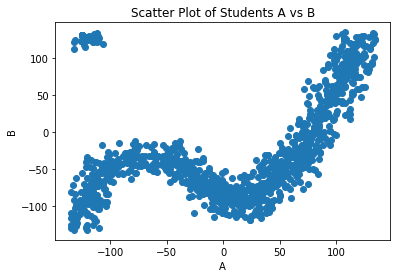

In [13]:
plt.scatter(x =data.A, y = data.B)
plt.xlabel("A")
plt.ylabel("B")
plt.title("Scatter Plot of Students A vs B")
plt.show()

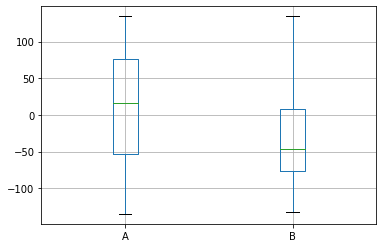

In [14]:
data.boxplot()

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)


In [16]:
cor = data.corr()
cor

,A,B
A,1.000000,0.454607
B,0.454607,1.000000


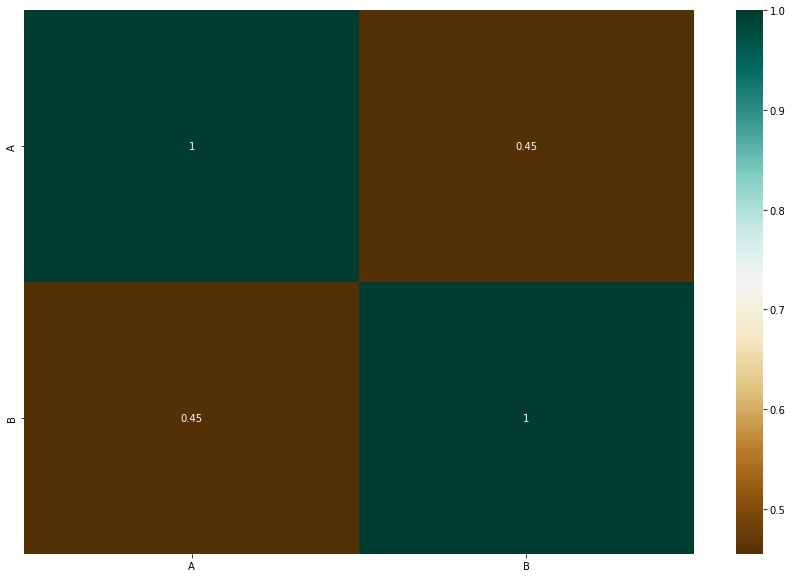

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,cmap='BrBG',annot=True)
plt.show()

In [19]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=100)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(X_test)

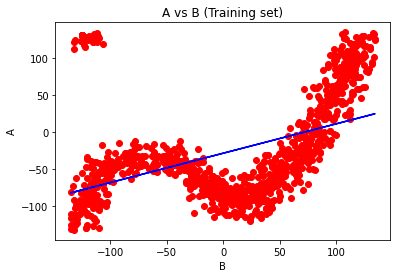

In [23]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('A vs B (Training set)')
plt.xlabel('B')
plt.ylabel('A')
plt.show()

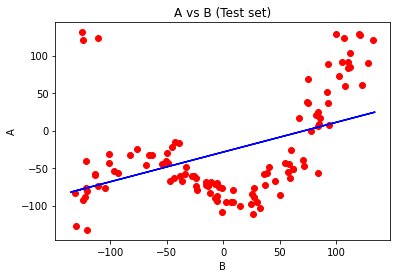

In [24]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('A vs B (Test set)')
plt.xlabel('B')
plt.ylabel('A')
plt.show()

In [25]:
y_pred

array([  7.97754786, -76.49702179, -41.67590244, -38.20481334,
        11.8649189 ,   5.17806704, -34.76522747, -10.45528094,
       -34.12397868, -17.74727063,   1.09750449, -47.98384177,
       -14.15141238, -30.64063966, -65.43149882,   2.04105129,
       -68.80114116,   4.86758079, -70.11323288,  15.89287663,
       -17.74727063,   8.06780797, -80.44588009, -15.73417079,
       -55.85522793, -53.76201651, -73.50712555, -32.77314961,
        -2.17836796, -47.35933493,  -8.85335029, -12.41909543,
       -78.29953568, -42.14149619, -16.85825412, -38.32712542,
       -30.71285342,  -5.47851104,   4.59886434, -72.35415522,
       -77.90376924,  -0.77685571,  12.90178035, -54.55354938,
       -49.92729197, -68.72114117, -39.56331576, -77.11223637,
       -76.32070349,  20.10277875, -25.26683295, -38.72289185,
        -0.32020706, -30.73571399, -37.67299524,  15.10134375,
        10.76762594, -29.22449734,  15.67708039,  19.04154419,
       -27.64143158,  13.69565118,  -6.84843986,  -5.36

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.16098624340324452

In [26]:
print(regressor.coef_)
print(regressor.intercept_)

[0.39576644]
-28.683615731228564


In [27]:
# import DecisionTreeRegressor module
from sklearn.tree import DecisionTreeRegressor

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=105)

# Instantiate the regressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

# Fit and train the model using training data sets
DTree.fit(X_train,y_train)

# Predict on the test data
y1_pred=DTree.predict(X_test)

In [28]:
y1_pred

array([ -65.01735559,  -86.5       ,  -80.04480123,  -21.48768832,
       -100.        ,  -65.01735559,  -86.5       ,   62.41608167,
          4.07905264,  -28.31035086,  -25.42900714,  -95.        ,
         51.56531903,  -86.90334765,  -66.8321257 ,  -63.41746806,
         41.03634764,  -72.78638358,  -72.33333333,  -72.98043377,
        -74.5       ,  -92.03892106,  -83.        ,  -33.        ,
        -83.        , -119.6713673 ,   48.02855258,   -0.51070315,
         92.92781851, -132.0322057 ,  -16.22572101,  -66.        ,
        -84.51644626,  -36.62275691,  -83.        ,  -39.        ,
        -87.15485176,  -50.94802619,  109.9652616 ,  -74.86354732,
        -36.97238581,  -45.        ,  -47.06037708, -100.        ,
         61.        ,  -68.40823423,  -39.74783596,  -18.11702917,
         13.        ,  -43.12700344,   -2.0844117 ,   11.947285  ,
        -93.        ,  -67.20442906,  103.        ,  -83.65416341,
        -58.        ,   38.30762372, -107.3906961 ,   26.96618

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y1_pred)

0.417680784970633

In [31]:
# Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor

# Instantiate the regressor
ETree=ExtraTreesRegressor(n_estimators = 100)

# Fit and train the model using training data sets
ETree.fit(X_train,y_train)

# Predict on the test data
y2_pred=ETree.predict(X_test)

In [33]:
y2_pred

array([ -64.68965695,  -86.5       ,   24.06530425,  -29.49472783,
       -100.        ,  -64.68965695,  -86.69839262,   50.91000653,
         -2.33476429,  -28.87310876,  -28.8002189 ,  -91.2257152 ,
         51.56531903,  -75.95058615,  -62.92752422,  -64.64562509,
         42.27726073,  -58.1467311 ,  -72.33333333,  -62.76525688,
        -61.00379609,  -87.55647113,  -84.1878879 ,  -28.70400303,
        -82.9344849 , -103.61896969,   31.37007422,   -0.96251534,
         93.41358124, -130.52415762,  -21.93435713,  -67.82491156,
        -84.55918801,  -34.04819446,  -83.        ,  -30.90046024,
        -85.66590325,  -51.11803526,  108.28813067,  -80.69376862,
        -38.20584937,  -42.41160128,  -75.22976775, -100.        ,
         52.81754129,  -73.07759928,  -36.30891411,  -18.74000742,
         13.        ,  -52.22643631,   19.44476538,  -10.38673031,
        -93.        ,  -66.7341109 ,  102.77437967,  -69.82832077,
        -58.        ,   46.32069129,  -99.93556164,   60.62623

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y2_pred)

0.43347245280901914